In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.decomposition import PCA

# Configuraci√≥n est√©tica
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)
print("Modulos importados")

Modulos importados


In [4]:
# Cargar el dataset
df = pd.read_csv("csv/ml-32m/ratings.csv")

# Vista inicial
df.head()

userId  movieId  rating  timestamp
0       1       17     4.0  944249077
1       1       25     1.0  944250228
2       1       29     2.0  943230976
3       1       30     5.0  944249077
4       1       32     5.0  943228858

In [5]:
# Informaci√≥n general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 976.6 MB


In [6]:
# Estad√≠sticas descriptivas
df.describe()

userId       movieId        rating     timestamp
count  3.200020e+07  3.200020e+07  3.200020e+07  3.200020e+07
mean   1.002785e+05  2.931861e+04  3.540396e+00  1.275241e+09
std    5.794905e+04  5.095816e+04  1.058986e+00  2.561630e+08
min    1.000000e+00  1.000000e+00  5.000000e-01  7.896520e+08
25%    5.005300e+04  1.233000e+03  3.000000e+00  1.051012e+09
50%    1.002970e+05  3.452000e+03  3.500000e+00  1.272622e+09
75%    1.504510e+05  4.419900e+04  4.000000e+00  1.503158e+09
max    2.009480e+05  2.927570e+05  5.000000e+00  1.697164e+09

In [7]:
# Estadisticas varias
# N√∫mero de usuarios y pel√≠culas √∫nicos
num_users = df['userId'].nunique()
num_movies = df['movieId'].nunique()

# Estad√≠sticas de ratings
rating_min = df['rating'].min()
rating_max = df['rating'].max()
rating_mean = df['rating'].mean()

# Rango de tiempo (de timestamp a fecha)
df['date'] = pd.to_datetime(df['timestamp'], unit='s')
date_min = df['date'].min()
date_max = df['date'].max()

# Mostrar resultados
print(f'Usuarios √∫nicos: {num_users:,}')
print(f'Pel√≠culas √∫nicas: {num_movies:,}')
print(f'Rating m√≠nimo: {rating_min}')
print(f'Rating m√°ximo: {rating_max}')
print(f'Rating promedio: {rating_mean:.2f}')
print(f'Rango temporal: {date_min.date()} ‚Üí {date_max.date()}')

Usuarios √∫nicos: 200,948
Pel√≠culas √∫nicas: 84,432
Rating m√≠nimo: 0.5
Rating m√°ximo: 5.0
Rating promedio: 3.54
Rango temporal: 1995-01-09 ‚Üí 2023-10-13


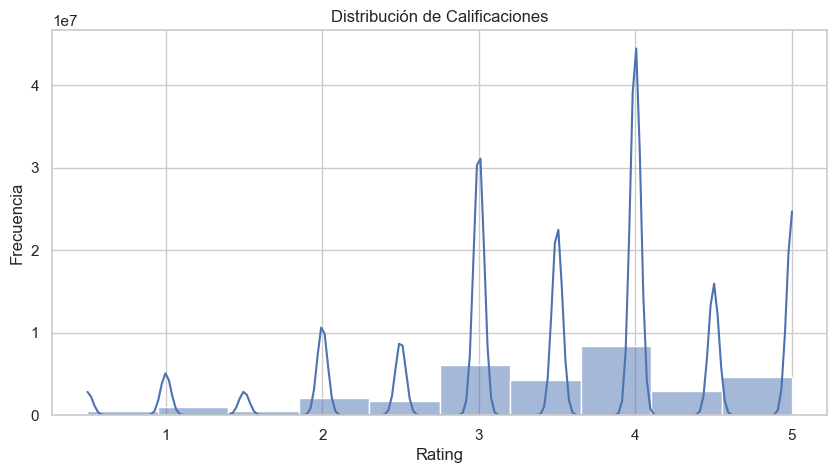

In [8]:
# Distribuci√≥n de calificaciones
sns.histplot(df['rating'], bins=10, kde=True)
plt.title("Distribuci√≥n de Calificaciones")
plt.xlabel("Rating")
plt.ylabel("Frecuencia")
plt.show()

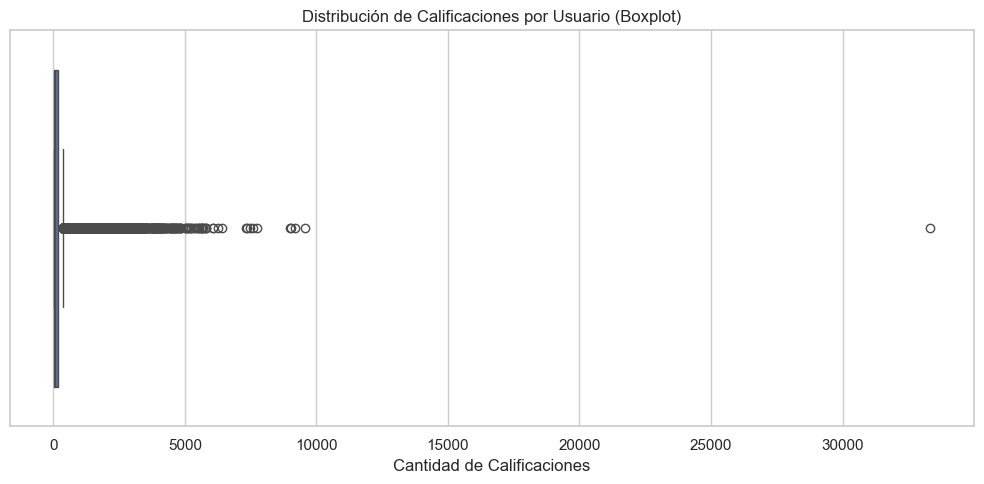

In [9]:
user_counts = df['userId'].value_counts()
sns.boxplot(x=user_counts)
plt.title("Distribuci√≥n de Calificaciones por Usuario (Boxplot)")
plt.xlabel("Cantidad de Calificaciones")
plt.tight_layout()
plt.show()


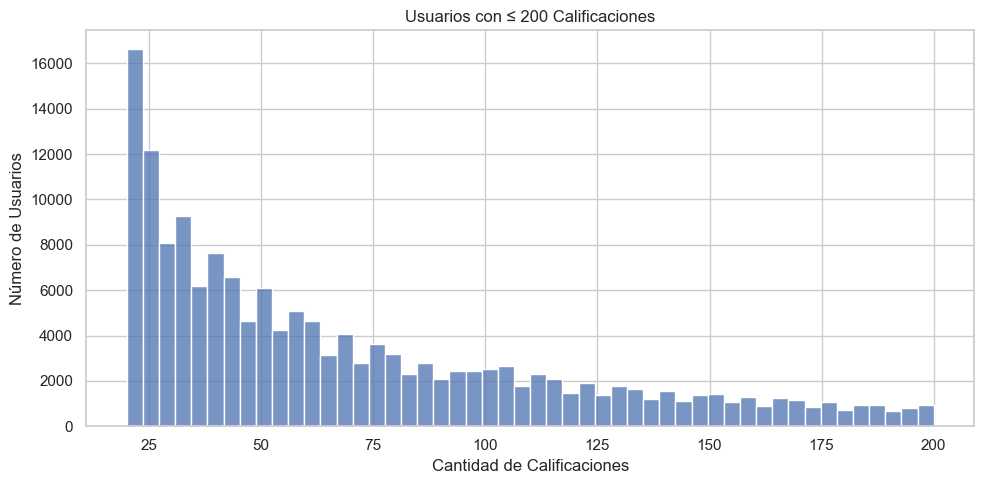

In [10]:
user_counts_trimmed = user_counts[user_counts <= 200]
sns.histplot(user_counts_trimmed, bins=50, kde=False)
plt.title("Usuarios con ‚â§ 200 Calificaciones")
plt.xlabel("Cantidad de Calificaciones")
plt.ylabel("N√∫mero de Usuarios")
plt.tight_layout()
plt.show()


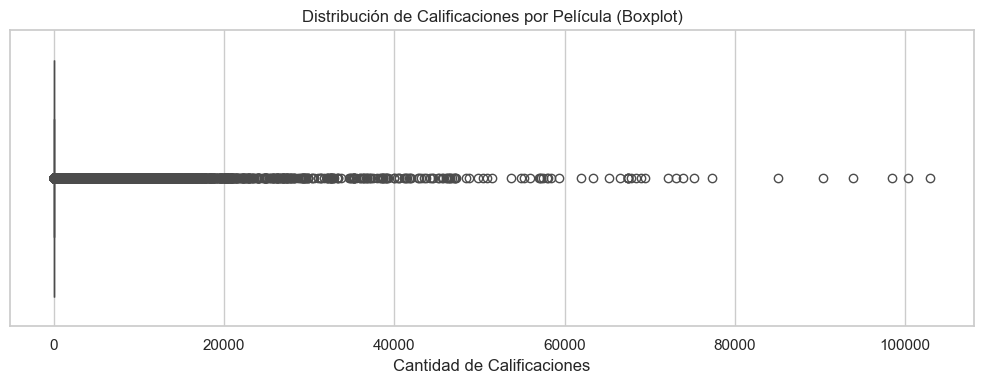

In [11]:
movie_counts = df['movieId'].value_counts()
plt.figure(figsize=(10, 4))
sns.boxplot(x=movie_counts)
plt.title("Distribuci√≥n de Calificaciones por Pel√≠cula (Boxplot)")
plt.xlabel("Cantidad de Calificaciones")
plt.tight_layout()
plt.show()

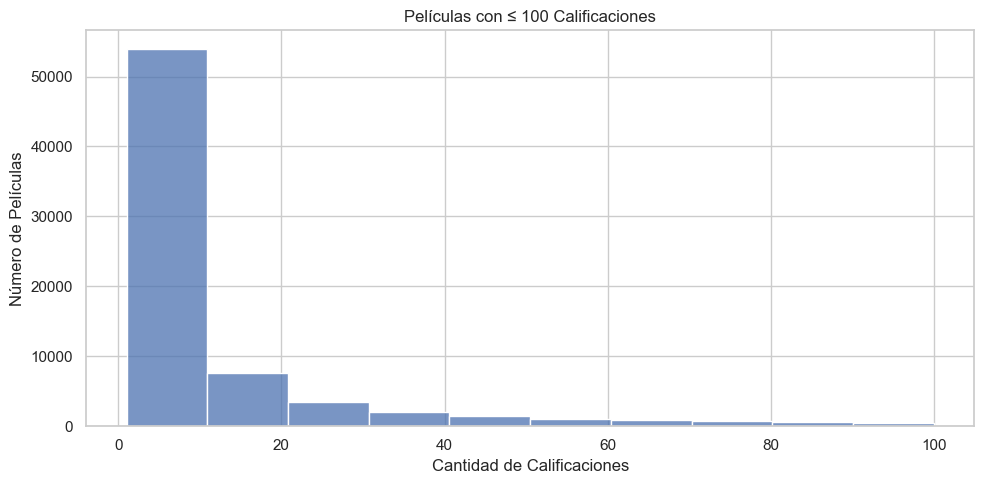

In [12]:
movie_counts_trimmed = movie_counts[movie_counts <= 100]

plt.figure(figsize=(10, 5))
sns.histplot(movie_counts_trimmed, bins=10, kde=False)
plt.title("Pel√≠culas con ‚â§ 100 Calificaciones")
plt.xlabel("Cantidad de Calificaciones")
plt.ylabel("N√∫mero de Pel√≠culas")
plt.tight_layout()
plt.show()

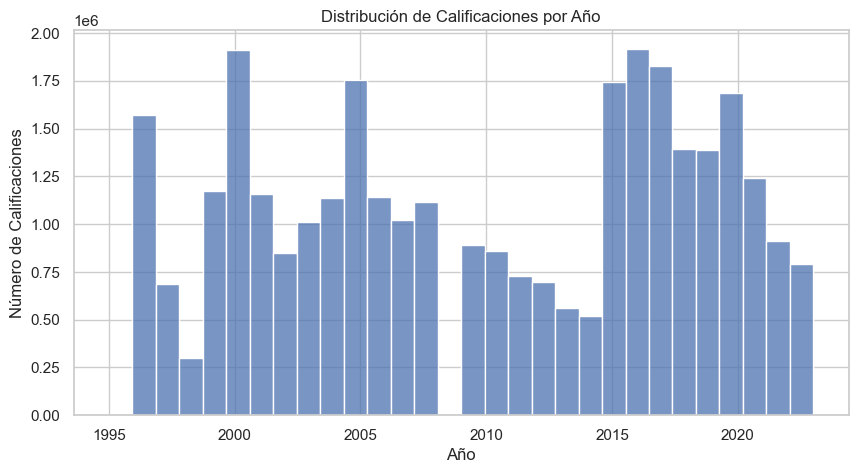

In [13]:
# Conversi√≥n de timestamp a fecha
df['date'] = pd.to_datetime(df['timestamp'], unit='s')
df['year'] = df['date'].dt.year

# Evoluci√≥n de calificaciones por a√±o
sns.histplot(df['year'], bins=30, kde=False)
plt.title("Distribuci√≥n de Calificaciones por A√±o")
plt.xlabel("A√±o")
plt.ylabel("N√∫mero de Calificaciones")
plt.show()

# Analisis estadistico

In [14]:
# Estad√≠sticas generales del rating
rating_stats = df['rating'].describe()
print("Estad√≠sticas de Ratings:")
print(rating_stats)

# Desviaci√≥n est√°ndar
std_rating = df['rating'].std()
print("\nDesviaci√≥n est√°ndar del rating:", round(std_rating, 4))

# N√∫mero total de usuarios √∫nicos
num_users = df['userId'].nunique()
print("\nTotal de usuarios √∫nicos:", num_users)

# N√∫mero total de √≠tems √∫nicos
num_items = df['movieId'].nunique()
print("Total de pel√≠culas √∫nicas:", num_items)

# √çtem m√°s consumido
top_item = df['movieId'].value_counts().idxmax()
top_item_count = df['movieId'].value_counts().max()
print("\nPel√≠cula m√°s calificada:", top_item, "con", top_item_count, "calificaciones")

# √çtem menos consumido
bottom_item = df['movieId'].value_counts().idxmin()
bottom_item_count = df['movieId'].value_counts().min()
print("Pel√≠cula menos calificada:", bottom_item, "con", bottom_item_count, "calificaci√≥n")

# Usuario m√°s activo
top_user = df['userId'].value_counts().idxmax()
top_user_count = df['userId'].value_counts().max()
print("\nUsuario m√°s activo:", top_user, "con", top_user_count, "ratings")

# Usuario menos activo
bottom_user = df['userId'].value_counts().idxmin()
bottom_user_count = df['userId'].value_counts().min()
print("Usuario menos activo:", bottom_user, "con", bottom_user_count, "rating")


Estad√≠sticas de Ratings:
count    3.200020e+07
mean     3.540396e+00
std      1.058986e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

Desviaci√≥n est√°ndar del rating: 1.059

Total de usuarios √∫nicos: 200948
Total de pel√≠culas √∫nicas: 84432

Pel√≠cula m√°s calificada: 318 con 102929 calificaciones
Pel√≠cula menos calificada: 182833 con 1 calificaci√≥n

Usuario m√°s activo: 175325 con 33332 ratings
Usuario menos activo: 18648 con 20 rating


# Analisis de outliers

In [15]:
# Usuarios que solo usan una calificaci√≥n
user_rating_unique_counts = df.groupby('userId')['rating'].nunique()

# Usuarios que solo votan con 1 calificaci√≥n √∫nica (posible outlier)
outlier_users = user_rating_unique_counts[user_rating_unique_counts == 1]
print(f"Usuarios que solo usan un mismo valor de rating: {len(outlier_users)}")

# ¬øQu√© calificaci√≥n espec√≠fica usaron?
outlier_details = df[df['userId'].isin(outlier_users.index)].groupby('userId')['rating'].first().value_counts()
print("Distribuci√≥n de rating √∫nico entre los outliers:")
print(outlier_details)

# Usuarios que solo dan calificaciones altas o bajas (por ejemplo, solo 5.0 o solo 0.5)
only_high = outlier_details.get(5.0, 0)
only_low = outlier_details.get(0.5, 0)


Usuarios que solo usan un mismo valor de rating: 401
Distribuci√≥n de rating √∫nico entre los outliers:
rating
5.0    359
0.5     14
4.0     10
3.0     10
1.0      5
2.5      2
3.5      1
Name: count, dtype: int64


# Experimentos

In [16]:
# üîπ 2. Convertir timestamp
df['date'] = pd.to_datetime(df['timestamp'], unit='s')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.weekday

In [17]:
# üîπ 3. Codificar temporada, fin de semana y feriado
def get_season(month):
    if month in [12, 1, 2]:
        return 'invierno'
    elif month in [3, 4, 5]:
        return 'primavera'
    elif month in [6, 7, 8]:
        return 'verano'
    else:
        return 'oto√±o'

df['season'] = df['month'].apply(get_season)

In [18]:
df['is_weekend'] = df['weekday'].isin([5, 6])


In [19]:
ecu_holidays = holidays.Ecuador(years=range(df['year'].min(), df['year'].max() + 1))
df['is_holiday'] = df['date'].isin(ecu_holidays)
print(df[['season', 'is_weekend', 'is_holiday']].describe(include='all'))

C:\Users\s3_xc\AppData\Local\Temp\ipykernel_5556\1763053412.py:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df['is_holiday'] = df['date'].isin(ecu_holidays)


          season is_weekend is_holiday
count   32000204   32000204   32000204
unique         4          2          2
top     invierno      False      False
freq     8165101   22432379   32000192


In [20]:
# üîπ 4. Codificaci√≥n booleana y categ√≥rica
df['season_encoded'] = df['season'].map({'invierno': 0, 'primavera': 1, 'verano': 2, 'oto√±o': 3})
df['is_weekend'] = df['is_weekend'].astype(int)
df['is_holiday'] = df['is_holiday'].astype(int)


In [21]:
# üîπ 5. Calcular rating_previous
df = df.sort_values(['userId', 'timestamp'])
df['rating_previous'] = df.groupby('userId')['rating'].shift().fillna(0)

In [22]:
# üîπ Asegurar que week_of_year sea int para el merge
df['week_of_year'] = df['date'].dt.isocalendar().week.astype(int)

# üîπ Calcular consumo semanal
consumo = df.groupby(['userId', 'week_of_year']).size().reset_index(name='consumo_semanal_usuario')
df = pd.merge(df, consumo, on=['userId', 'week_of_year'], how='left')


df['antiguedad_rating'] = 2025 - df['year']
df['diferencia_rating_anterior'] = df['rating'] - df['rating_previous']
df['diferencia_rating_anterior'].fillna(0, inplace=True)


C:\Users\s3_xc\AppData\Local\Temp\ipykernel_5556\648649064.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['diferencia_rating_anterior'].fillna(0, inplace=True)


In [23]:
# üîπ 7. Ingenier√≠a UMAP
temporal_features = ['year', 'month', 'weekday', 'season_encoded', 'is_weekend', 'is_holiday', 'rating_previous']
X_scaled = StandardScaler().fit_transform(df[temporal_features])

In [24]:
# UMAP sobre muestra aleatoria
sample_size = 100_000
sample_idx = np.random.choice(len(X_scaled), size=sample_size, replace=False)
X_sample = X_scaled[sample_idx]

In [25]:
reducer = umap.UMAP(n_components=3, random_state=42, init='random', n_neighbors=15, min_dist=0.1)
reducer.fit(X_sample)
X_umap_full = reducer.transform(X_scaled)

c:\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [26]:
# Agregar latentes al dataframe
df[['temporal_1', 'temporal_2', 'temporal_3']] = X_umap_full

# üîπ 8. Seleccionar columnas finales para la RNN
columns_to_keep = [
    'userId', 'movieId',
    'temporal_1', 'temporal_2', 'temporal_3',
    'rating', 'timestamp',
    'rating_previous', 'is_weekend', 'season_encoded', 'is_holiday',
    'year', 'month', 'weekday',
    'consumo_semanal_usuario', 'antiguedad_rating', 'diferencia_rating_anterior'
]


In [28]:
df_rnn_final = df[columns_to_keep]

# üîπ 9. Guardar dataset final
df_rnn_final.to_csv("dataset_final_completo.csv", index=False)
print("‚úÖ Dataset RNN FINAL generado exitosamente.")

‚úÖ Dataset RNN FINAL generado exitosamente.
